# Table of Contents
- [Introduction](#intro)
- [Gathering Data](#gathering)
- [Assessing Data](#assessing)
    - [List of Founded Issues](#list)
- [Cleaning Data](#cleaning)
- [Data Visualization](#dv1)
- [Summary of Main Findings](#recap)



<a id='intro'></a>
## Introduction
Ford Gobike or Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share.

In June 2019, the system rebranded to Bay Wheels and dropped the Ford naming. Along with the rebranding, Bay Wheels also deployed a new generation of bicycles which can use bikeshare docks and also operate in a dockless mode, in which customers can lock the bike to a bicycle rack with a built-in lock.

For more information, check here: https://en.wikipedia.org/wiki/Bay_Wheels

In this project, we are going to explore the dataset, clean it if posipole, and present it as visuals.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os as os
import io as io
import zipfile as zp
import requests as rq


<a id='gathering'></a>
## Gathering Data

From the URL: https://s3.amazonaws.com/fordgobike-data/index.html . We can see that there are a lot of separate data sets. And we need to combine them into one data set.

To do that, First, we need to collect and gather all the datasets. Second, we merge them together.

In [6]:
# Store all files.
os.makedirs('Datasets')
pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format('Datasets'))
for x in range(1,13):
    month = str(x)
    month_With_zero = month.zfill(2)
    
    data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_With_zero + '-fordgobike-tripdata.csv.zip'
    get_url = rq.get(data_url)
    # Open the zip-file
    open_zipfile = zp.ZipFile(io.BytesIO(get_url.content))
    # Extract files from zip-file
    extract_zipfile = open_zipfile.extractall('Datasets')
    
for x in range(1,5):
    month = str(x)
    month_With_zero = month.zfill(2)
    
    data_url = 'https://s3.amazonaws.com/fordgobike-data/2019' + month_With_zero + '-fordgobike-tripdata.csv.zip'
    get_url = rq.get(data_url)
    # Open the zip-file
    open_zipfile = zp.ZipFile(io.BytesIO(get_url.content))
    # Extract files from zip-file
    extract_zipfile = open_zipfile.extractall('Datasets')
        
    

In [7]:
# Save all files in a list
dataset_list = []
for x in os.listdir('Datasets'):
    dataset_list.append(pd.read_csv('Datasets'+'/'+x))
# merg all files in the list
df = pd.concat(dataset_list)
df.to_csv('fordgobike_data.csv')
df = pd.read_csv('fordgobike_data.csv')
df.shape

C:\Users\abmalessa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.
C:\Users\abmalessa\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3254325, 18)

In [3]:
df = pd.read_csv('fordgobike_data.csv')
df.shape

C:\Users\abmalessa\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3254325, 18)

In [4]:
df

,Unnamed: 0,Unnamed: 0.1,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,0,0.0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,1,1.0,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,2,2.0,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,3,3.0,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,4,4.0,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber
5,5,5.0,1487,NaN,9226,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-01-01 01:24:47.1660,NaN,NaN,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 22:51:00.9180,Customer
6,6,6.0,3539,NaN,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.6190,1991.0,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.4220,Customer
7,7,7.0,1503,NaN,4334,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-01-01 00:58:51.2110,NaN,NaN,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 23:46:37.1960,Customer
8,8,8.0,3125,NaN,4150,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:18.3080,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:37:07.5480,Customer
9,9,9.0,2543,NaN,4238,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:17.0530,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:35:38.1450,Customer


<a id='assessing'></a>
## Assessing Data

In our dataset, we have 3254325 rows and 18 cucolumns.

In this step, we will see if there is anything that we can fix.

In [4]:
# check for unneeded columns and wrong data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 18 columns):
Unnamed: 0                 int64
Unnamed: 0.1               float64
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(8), int64(3), object(7)
memory usage: 446.9+ MB


In [6]:
# check if there was a duplicate file stored in the list previously
df.duplicated().sum()


0

In [7]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,3.254325e+06,519700.000000,3.254325e+06,3.254325e+06,3.241824e+06,3.254325e+06,3.254325e+06,3.036159e+06,3.241824e+06,3.254325e+06,3.254325e+06
mean,1.184710e+05,259849.500000,2.729018e+03,8.743223e+02,1.191966e+02,3.776874e+01,-1.223519e+02,1.983137e+03,1.209191e+02,3.776880e+01,-1.223530e+02
std,1.014070e+05,150024.611786,1.724443e+03,2.468547e+03,1.029334e+02,1.342571e-01,3.220803e-01,1.043760e+01,1.030184e+02,1.029275e-01,1.601559e-01
min,0.000000e+00,0.000000,1.000000e+01,6.100000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,1.878000e+03,3.000000e+00,0.000000e+00,-1.224737e+02
25%,4.785700e+04,129924.750000,1.336000e+03,3.510000e+02,3.000000e+01,3.777143e+01,-1.224108e+02,1.978000e+03,3.100000e+01,3.777106e+01,-1.224117e+02
50%,9.577200e+04,259849.500000,2.579000e+03,5.570000e+02,8.700000e+01,3.778127e+01,-1.223974e+02,1.985000e+03,8.800000e+01,3.778107e+01,-1.223983e+02
75%,1.573790e+05,389774.250000,3.821000e+03,8.730000e+02,1.860000e+02,3.779625e+01,-1.222935e+02,1.991000e+03,1.880000e+02,3.779539e+01,-1.222934e+02
max,5.196990e+05,519699.000000,7.108000e+03,8.636900e+04,4.200000e+02,4.551000e+01,0.000000e+00,2.001000e+03,4.200000e+02,4.551000e+01,0.000000e+00


In [8]:
df['bike_id'].value_counts()

4452    1532
4319    1430
4464    1421
1161    1412
4320    1389
4417    1384
2663    1372
2692    1370
4318    1366
2545    1366
2016    1358
4390    1354
232     1351
3379    1350
2174    1347
4405    1343
2387    1339
1396    1336
2185    1329
4343    1325
4450    1323
3961    1323
4384    1319
2882    1312
4373    1310
746     1307
3068    1303
2497    1302
4404    1292
126     1290
        ... 
4425       3
1471       3
4849       3
6349       3
4297       3
2345       3
6583       3
1361       2
3745       2
3850       2
735        2
6043       2
6315       2
7107       2
4169       2
4599       2
5457       2
6990       2
6975       2
646        2
3763       1
6271       1
6987       1
5777       1
6601       1
6702       1
5688       1
3323       1
6304       1
3758       1
Name: bike_id, Length: 6930, dtype: int64

<a id='list'></a>
### List of Founded Issues

- The following attributes are not needed [Unnamed: 0, Unnamed: 0.1, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude]

- The following attributes should be a datetime [end_time, start_time]

- The following attributes should be a string (object) [bike_id, end_station_id, start_station_id]

- The following attributes should be a category [bike_share_for_all_trip, member_gender, user_type]

- The following attribute should be a integer [member_birth_year]


<a id='cleaning'></a>
## Cleaning Data

After finding some issues in the previous step. Here, we will fix these issues.

Define
<br>
<font color=blue> First, let's make a copy of our dataset. Just to be safe
 </font>

code

In [5]:
# make a copy
df_copy = df.copy()

test

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 18 columns):
Unnamed: 0                 int64
Unnamed: 0.1               float64
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(8), int64(3), object(7)
memory usage: 446.9+ MB


Define
<br>
<font color=blue> Now, let's remove the following columns [Unnamed: 0, Unnamed: 0.1, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude]
 </font>

code

In [7]:
df_copy.rename(columns={'Unnamed: 0':'unnamed'}, inplace=True)
df_copy.rename(columns={'Unnamed: 0.1':'unnamed1'}, inplace=True)


In [8]:
df_copy.drop(['unnamed'], 1, inplace=True)
df_copy.drop(['unnamed1'], 1, inplace=True)


In [9]:
df_copy.drop(['start_station_latitude'], 1, inplace=True)
df_copy.drop(['start_station_longitude'], 1, inplace=True)
df_copy.drop(['end_station_latitude'], 1, inplace=True)
df_copy.drop(['end_station_longitude'], 1, inplace=True)

test

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 12 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(3), int64(2), object(7)
memory usage: 297.9+ MB


Define
<br>
<font color=blue> Now, let's fix the datatype of all columns
 </font>

code

In [11]:
# change data type
df_copy['bike_id'] = df_copy['bike_id'].astype(object)
df_copy['end_station_id'] = df_copy['end_station_id'].astype(object)
df_copy['start_station_id'] = df_copy['start_station_id'].astype(object)
df_copy['start_time'] = pd.to_datetime(df_copy.start_time)
df_copy['end_time'] = pd.to_datetime(df_copy.end_time)
df_copy['bike_share_for_all_trip'] = df_copy['bike_share_for_all_trip'].astype('category')
df_copy['member_gender'] = df_copy['member_gender'].astype('category')
df_copy['user_type'] = df_copy['user_type'].astype('category')


In [12]:
df_copy['member_birth_year'] = np.nan_to_num(df_copy['member_birth_year']).astype(int)


test

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 12 columns):
bike_id                    object
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             object
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          int32
member_gender              category
start_station_id           object
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
dtypes: category(3), datetime64[ns](2), int32(1), int64(1), object(5)
memory usage: 220.4+ MB


In [14]:
df_copy

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_name,start_time,user_type
0,96,NaN,80110,43,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.245,1987,Male,74,Laguna St at Hayes St,2017-12-31 16:57:39.654,Customer
1,88,NaN,78800,96,Dolores St at 15th St,2018-01-01 13:49:55.617,1965,Female,284,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.842,Customer
2,1094,NaN,45768,245,Downtown Berkeley BART,2018-01-01 11:28:36.883,0,NaN,245,Downtown Berkeley BART,2017-12-31 22:45:48.411,Customer
3,2831,NaN,62172,5,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.531,0,NaN,60,8th St at Ringold St,2017-12-31 17:31:10.636,Customer
4,3167,NaN,43603,247,Fulton St at Bancroft Way,2018-01-01 02:29:57.571,1997,Female,239,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.001,Subscriber
5,1487,NaN,9226,30,San Francisco Caltrain (Townsend St at 4th St),2018-01-01 01:24:47.166,0,NaN,30,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 22:51:00.918,Customer
6,3539,NaN,4507,259,Addison St at Fourth St,2018-01-01 01:04:35.619,1991,Female,259,Addison St at Fourth St,2017-12-31 23:49:28.422,Customer
7,1503,NaN,4334,284,Yerba Buena Center for the Arts (Howard St at ...,2018-01-01 00:58:51.211,0,NaN,284,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 23:46:37.196,Customer
8,3125,NaN,4150,20,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:18.308,0,NaN,20,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:37:07.548,Customer
9,2543,NaN,4238,20,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:17.053,0,NaN,20,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:35:38.145,Customer


In [15]:
# save the new clean data frame
df_copy.to_csv('clean_fordgobike_data.csv', index=False)


<a id='dv1'></a>
## Data Visualization

This is the last step. Here we are going to translate our data to Visuals, making it easy to understand.

The approach here will be asking a question and then writing code to answer it.

First, let's take a general look

<font color=blue> Q1: First, let's see which station has the longest duration as a starting station
 </font>
 

In [18]:
# calculate [duration_sec] mean for all [start_station_name]
StartMean = df_copy.groupby('start_station_name').mean().sort_values('duration_sec',ascending=True)

In [31]:
# only take first and last 5 to make it look cleaner
top = StartMean.head(5)
tail = StartMean.tail(5)
Top_Tail_Start = pd.concat([top, tail])

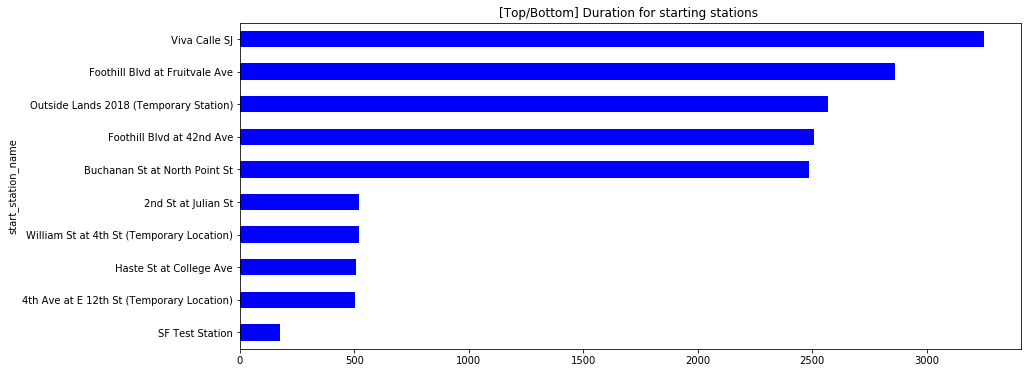

In [32]:
Top_Tail_Start['duration_sec'].plot.barh(stacked=False, title = '[Top/Bottom] Duration for starting stations ',color=('Blue'), figsize=(14, 6));

 Viva Calle SJ has the longest average duration for a starting station.
 
 SF Test Station has the shortest average duration for a starting station.

<font color=blue> Q2: Now, let's see which station has the longest duration as an ending station
 </font>
 

In [30]:
# calculate [duration_sec] mean for all [end_station_name]
EndMean = df_copy.groupby('end_station_name').mean().sort_values('duration_sec',ascending=True)

In [33]:
# only take first and last 5 to make it look cleaner
top = EndMean.head(5)
tail = EndMean.tail(5)
Top_Tail_End = pd.concat([top, tail])

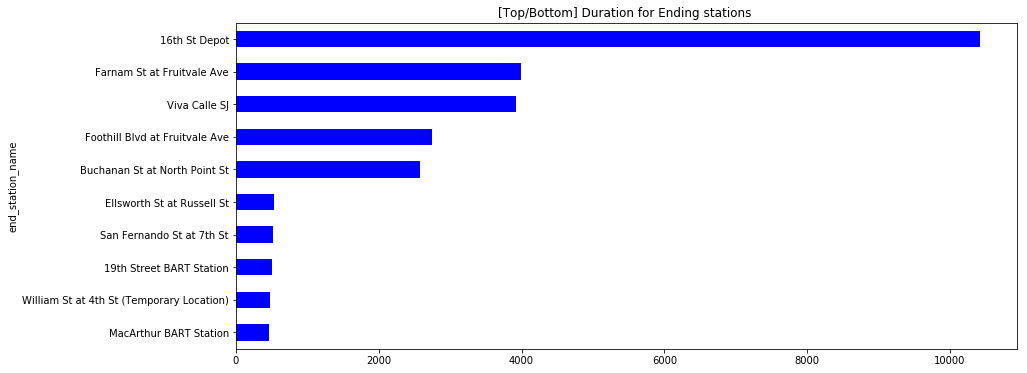

In [35]:
Top_Tail_End['duration_sec'].plot.barh(stacked=False, title = '[Top/Bottom] Duration for Ending stations ',color=('Blue'), figsize=(14, 6));

16th St Depot by far has the longest average duration for an ending station.
 
MacArthur BART Station has the shortest average duration for a ending station.

<font color=blue> Now, let's take a look at gender
 </font>
 

In [36]:
df_copy['member_gender'].value_counts()

Male      2251128
Female     735690
Other       49774
Name: member_gender, dtype: int64

In this dataset, we have more than 2 million male gobike users, and less than 1 million female gobike users

<font color=blue> Q3: Now, let's see the average age for each gender
 </font>

In [16]:
# add column [member_age]
df_copy['member_age'] = 2019 - df_copy['member_birth_year']


In [17]:
# remove all rows that have no value in column [member_birth_year]
age = df_copy[df_copy.member_age != 2019]


In [18]:
age.describe(percentiles = [ .975])

,duration_sec,member_birth_year,member_age
count,3.036159e+06,3.036159e+06,3.036159e+06
mean,7.776668e+02,1.983137e+03,3.586325e+01
std,2.013942e+03,1.043760e+01,1.043760e+01
min,6.100000e+01,1.878000e+03,1.800000e+01
50%,5.420000e+02,1.985000e+03,3.400000e+01
97.5%,2.246000e+03,1.997000e+03,6.100000e+01
max,8.628100e+04,2.001000e+03,1.410000e+02


In [19]:
# Let's remove outliers. No one is 141 years old!!!!
# We already know that more than 97.5 of this dataset are younger than 62.

age = age.query('member_age <=61')
age.describe()

,duration_sec,member_birth_year,member_age
count,2.972716e+06,2.972716e+06,2.972716e+06
mean,7.767778e+02,1.983831e+03,3.516882e+01
std,2.014068e+03,9.272062e+00,9.272062e+00
min,6.100000e+01,1.958000e+03,1.800000e+01
25%,3.450000e+02,1.979000e+03,2.800000e+01
50%,5.410000e+02,1.986000e+03,3.300000e+01
75%,8.360000e+02,1.991000e+03,4.000000e+01
max,8.628100e+04,2.001000e+03,6.100000e+01


In [20]:
# calculate age mean for all genders
GenderMean = age.groupby('member_gender').mean()


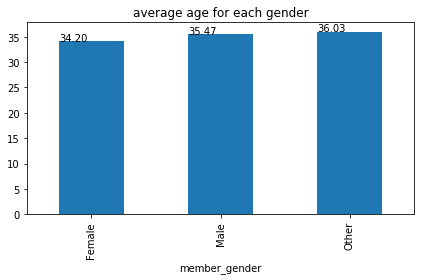

In [21]:
from decimal import Decimal

ax = GenderMean.plot(kind='bar', y='member_age', title='average age for each gender', legend=False)

# display the information above the bar plot
for p in ax.patches:
    ax.annotate('{:0.2f}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.tight_layout()
plt.show()

The average age for females is less than the average age of males.

Females have an average age of 34.20.

Males have an average age of 35.47.

<font color=blue> Q4: Now, let's see the user type fo each gender
 </font>

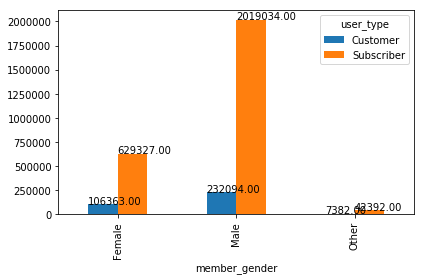

In [22]:
ax = pd.crosstab(df_copy['member_gender'], df_copy['user_type']).plot(kind='bar', stacked=False)

# display the information above the plot
for p in ax.patches:
    ax.annotate('{:0.2f}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.tight_layout()
plt.show()

We can see that in general subscribers are more than customers.

In the case of females, we have 629327 subscribers and 106363 customers.

In the case of males, we have 2019034 subscribers and 232094 customers.


<font color=blue> Q5: Now, let's see the bike share fo each gender
 </font>

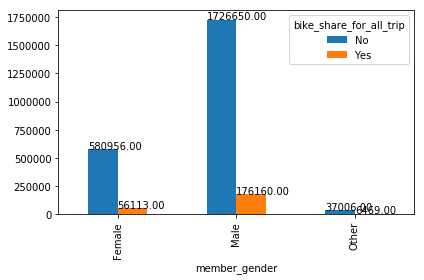

In [23]:
ax = pd.crosstab(df_copy['member_gender'], df_copy['bike_share_for_all_trip']).plot(kind='bar', stacked=False)

# display the information above the plot
for p in ax.patches:
    ax.annotate('{:0.2f}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.tight_layout()
plt.show()

We can see that most people are not subscribed to the bike share service.

In the case of females, we have 580956 non-subscribers and 56113 subscribers.

In the case of males, we have 1726650 non-subscribers and 176160 subscribers.

<font color=blue> Q6: Now, let's see the average age for each user type
 </font>

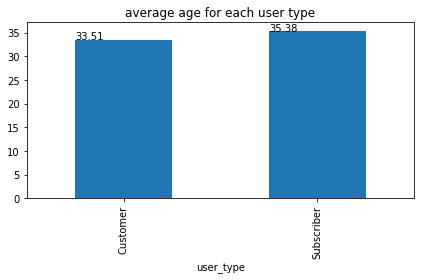

In [24]:
# calculate age mean for all user types
UserTypeMean = age.groupby('user_type').mean()

ax = UserTypeMean.plot(kind='bar', y='member_age', title='average age for each user type', legend=False)

# display the information above the plot
for p in ax.patches:
    ax.annotate('{:0.2f}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.tight_layout()
plt.show()

The average age for customers is less than the average age of subscribers.

customers have an average age of 33.51.

Subscribers have an average age of 35.38.

This could be an indication that younger people don't subscribe to this service.

<font color=blue> Q7: Now, let's see the the distribution of the trip duration
 </font>



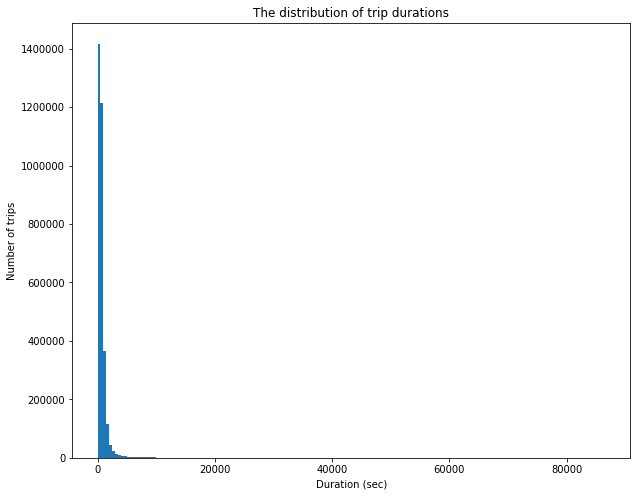

In [46]:
plt.figure(figsize=[10, 8])
plt.hist(data = df_copy, x = 'duration_sec', bins = np.arange(0, df_copy['duration_sec'].max()+500, 500))
plt.title('The distribution of trip durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of trips')
plt.show()


Because of the large proportion in rang of (0-1500), the figure above doesn't look good.

To Fix this, we need to add a better scale.

C:\Users\abmalessa\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:1717: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  self.set_xlim([v[0], v[1]], emit=emit, auto=False)


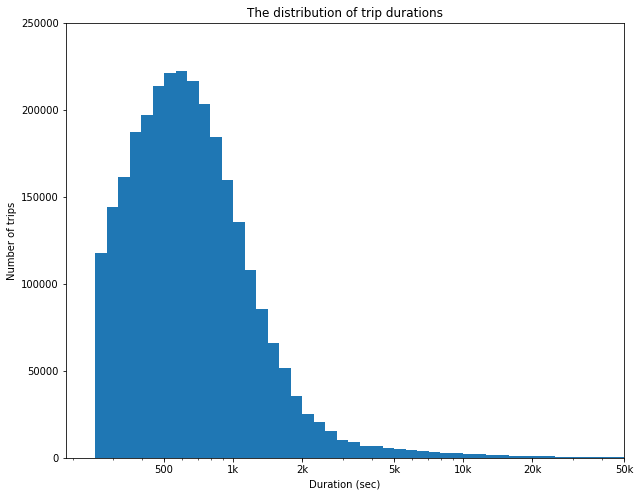

In [47]:
plt.figure(figsize=[10, 8])
plt.hist(data = df_copy, x = 'duration_sec', bins = 10 ** np.arange(2.4, np.log10(df_copy['duration_sec'].max()) + 0.05, 0.05))
plt.title('The distribution of trip durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [500, '1k', '2k', '5k', '10k', '20k', '50k'])
plt.axis([0, 50000, 0, 250000])
plt.show()

We can see that most trips are less than 5000 seconds.

the highest number of trips (peak) has a duration of 600 seconds. (10 min)

<font color=blue> Now, let's take a look at the time attributes and see if we can find anything
 </font>

First, to make it easier for us, let's split the time we have into smaller periodes like a month, day and hour.

In [25]:
# add more columns
df_copy['start_time_month_as_name']=df_copy['start_time'].dt.strftime('%B')
df_copy['start_time_month_as_number']=df_copy['start_time'].dt.month.astype(int)
df_copy['start_time_weekday']=df_copy['start_time'].dt.strftime('%a')
df_copy['start_time_day_in_month']=df_copy['start_time'].dt.day.astype(int)
df_copy['start_time_hour_in_day']=df_copy['start_time'].dt.hour

df_copy

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_name,start_time,user_type,member_age,start_time_month_as_name,start_time_month_as_number,start_time_weekday,start_time_day_in_month,start_time_hour_in_day
0,96,NaN,80110,43,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.245,1987,Male,74,Laguna St at Hayes St,2017-12-31 16:57:39.654,Customer,32,December,12,Sun,31,16
1,88,NaN,78800,96,Dolores St at 15th St,2018-01-01 13:49:55.617,1965,Female,284,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.842,Customer,54,December,12,Sun,31,15
2,1094,NaN,45768,245,Downtown Berkeley BART,2018-01-01 11:28:36.883,0,NaN,245,Downtown Berkeley BART,2017-12-31 22:45:48.411,Customer,2019,December,12,Sun,31,22
3,2831,NaN,62172,5,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.531,0,NaN,60,8th St at Ringold St,2017-12-31 17:31:10.636,Customer,2019,December,12,Sun,31,17
4,3167,NaN,43603,247,Fulton St at Bancroft Way,2018-01-01 02:29:57.571,1997,Female,239,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.001,Subscriber,22,December,12,Sun,31,14
5,1487,NaN,9226,30,San Francisco Caltrain (Townsend St at 4th St),2018-01-01 01:24:47.166,0,NaN,30,San Francisco Caltrain (Townsend St at 4th St),2017-12-31 22:51:00.918,Customer,2019,December,12,Sun,31,22
6,3539,NaN,4507,259,Addison St at Fourth St,2018-01-01 01:04:35.619,1991,Female,259,Addison St at Fourth St,2017-12-31 23:49:28.422,Customer,28,December,12,Sun,31,23
7,1503,NaN,4334,284,Yerba Buena Center for the Arts (Howard St at ...,2018-01-01 00:58:51.211,0,NaN,284,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 23:46:37.196,Customer,2019,December,12,Sun,31,23
8,3125,NaN,4150,20,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:18.308,0,NaN,20,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:37:07.548,Customer,2019,December,12,Sun,31,23
9,2543,NaN,4238,20,Mechanics Monument Plaza (Market St at Bush St),2018-01-01 00:46:17.053,0,NaN,20,Mechanics Monument Plaza (Market St at Bush St),2017-12-31 23:35:38.145,Customer,2019,December,12,Sun,31,23


<font color=blue>Q7: Now, let's take a look at the number of trips per day.

Text(0, 0.5, 'Number of rides')

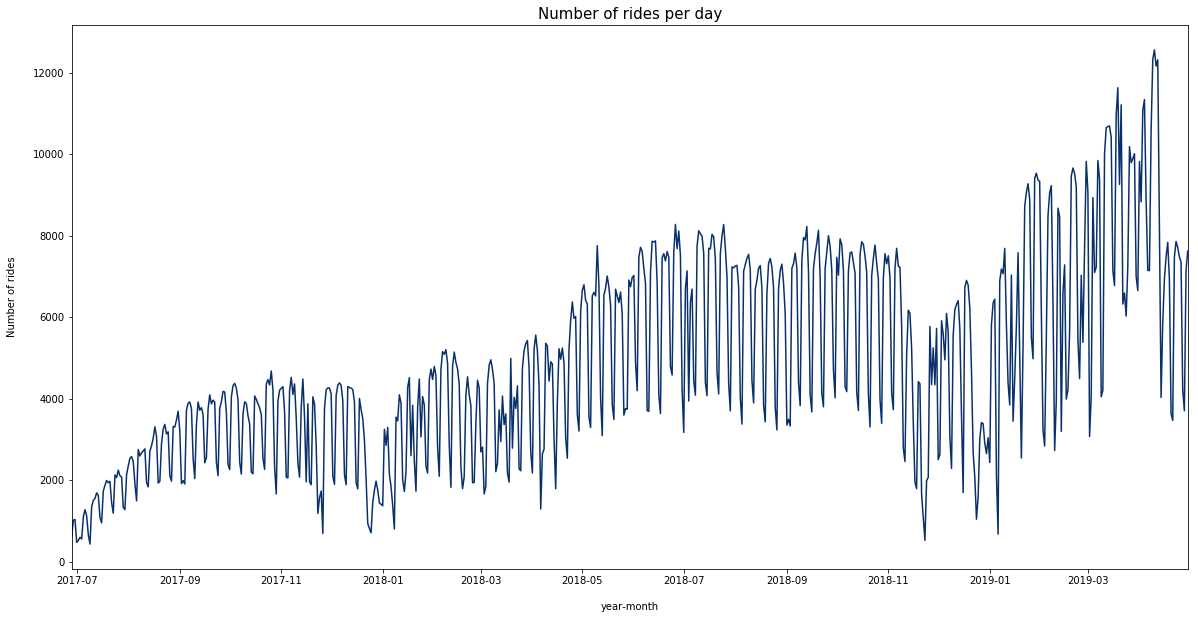

In [49]:
df_copy.groupby(df_copy['start_time'].dt.date).agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(20,10), colormap='Blues_r')
plt.title('Number of rides per day', fontsize=15, y=1)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('Number of rides', labelpad=16)

We can see from the figure above that the number of rides has increased. And it's increasing constantly.

This could be an indication that this service is working very well, and people are liking it.

This also could be an indication that the population of the city of San Francisco has increased in the last two years.


<font color=blue>Q8: Now, let's take a look at the number of trips per month.

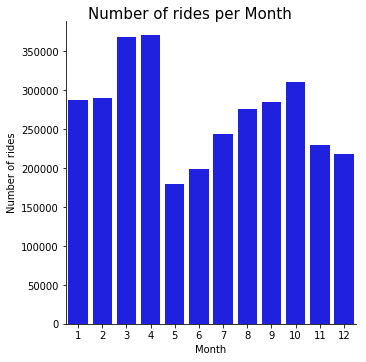

In [51]:
ax = sb.catplot(data=df_copy, x='start_time_month_as_number', kind='count', color = 'blue')
ax.set_axis_labels("Month", "Number of rides")
ax.fig.suptitle('Number of rides per Month', y=1, fontsize=15);



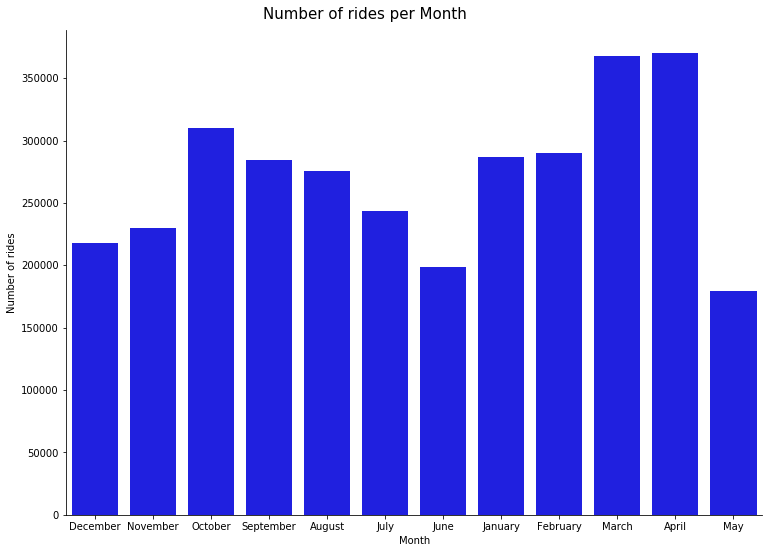

In [53]:
ax = sb.catplot(data=df_copy, x='start_time_month_as_name', kind='count', color = 'blue')
ax.fig.set_size_inches(12,8)
ax.set_axis_labels("Month", "Number of rides")
ax.fig.suptitle('Number of rides per Month', y=1, fontsize=15);


From the figures above, we can see that March and April have the highest number of trips (More than 350000).

May, on the other hand, has the least number of trips (Less than 200000).

All these 3 months are in spring. So at the beginning of the spring, we have the highest number of trips, and at the end of the spring we have the lowest number of trips.

<font color=blue>Q9: Now, let's take a look at the number of trips per weekday.

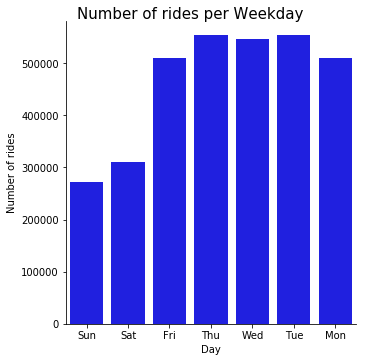

In [54]:
ax = sb.catplot(data=df_copy, x='start_time_weekday', kind='count', color = 'blue')
ax.set_axis_labels("Day", "Number of rides")
ax.fig.suptitle('Number of rides per Weekday', y=1, fontsize=15);


From above, we see that weekend days have the least number of trips ( about 300000).

Meanwhile, work days are so busy. All work has more than 500000 trips.

<font color=blue>Q10: Now, let's take a look at the number of trips per day in a month.

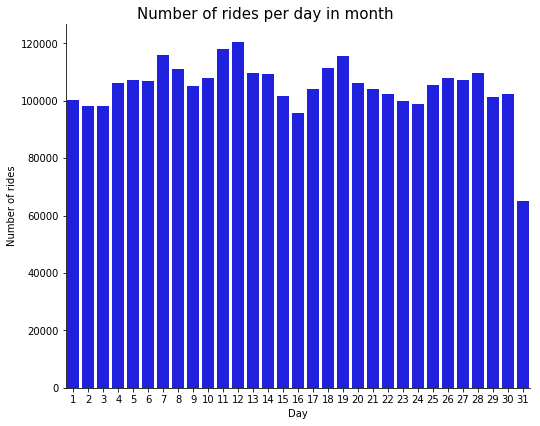

In [26]:
ax = sb.catplot(data=df_copy, x='start_time_day_in_month', kind='count', color = 'blue')
ax.fig.set_size_inches(8,6)
ax.set_axis_labels("Day", "Number of rides")
ax.fig.suptitle('Number of rides per day in month', y=1, fontsize=15);

From the figure above, it seems to be balanced. However, the 31st day is not the same as the others, there is an obvious shortens.

This could be because only 6 out of the 12 months have the 31st day

<font color=blue>Q11: Now, let's take a look at the number of trips per houre in a day.

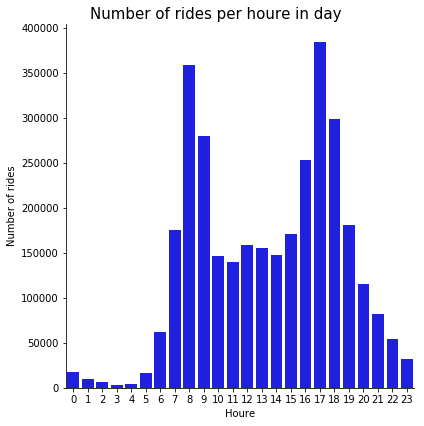

In [27]:
ax = sb.catplot(data=df_copy, x='start_time_hour_in_day', kind='count', color = 'blue')
ax.fig.set_size_inches(6,6)
ax.set_axis_labels("Houre", "Number of rides")
ax.fig.suptitle('Number of rides per houre in day', y=1, fontsize=15);

We see from the figure above that 8 am and 5 pm have the highest number of trips.

3 and 4 am have the least number of trips.

The reason behind that could be because of work. As we saw before working days have more trips than weekend days.

So it makes sense that the hours that people go to work and come back from work have the highest number of trips.

<font color=blue>Q12: Now, let's see the number of trips for every age group.

First, let's make some age groups. The age groups will be as follow:

    - From 18 to 30
    - From 31 to 40
    - From 41 to 50
    - More than 50

In [57]:
age['member_age_as_group'] = age['member_age'].apply(lambda x: 'From 18 to 30' if 0<x<=30
                                                  else 'From 31 to 40' if 30<x<=40
                                                  else 'From 41 to 50' if 40<x<=50
                                                  else 'More than 50' if 50<x
                                                  else x)

Now, let's make the plot

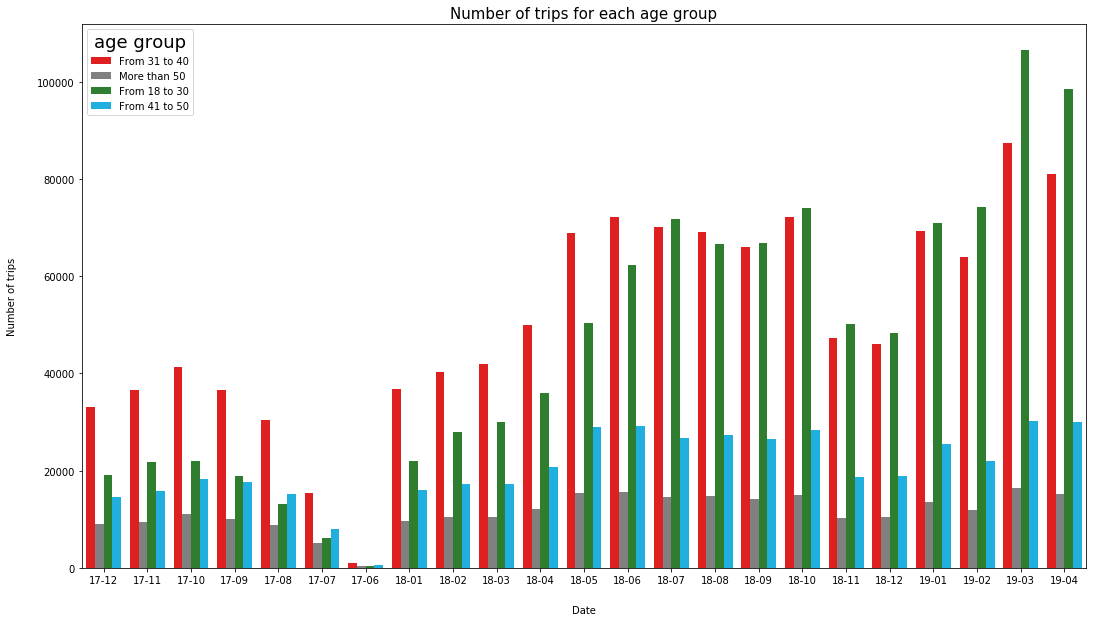

In [58]:
plt.figure(figsize=(18,10))
ax = sb.countplot(x=age['start_time'].dt.strftime('%y' + '-' + '%m'), hue='member_age_as_group', palette={'From 18 to 30': 'forestgreen', 'From 31 to 40': 'r', 'From 41 to 50': 'deepskyblue', 'More than 50': 'grey'}, data=age )
plt.title('Number of trips for each age group', fontsize=15, y=1)
plt.xlabel('Date', labelpad=20)
plt.ylabel('Number of trips', labelpad=20)
legend = ax.legend()
legend.set_title('age group', prop={'size':18})
ax = plt.gca()


From above, we can see that it used to be people form 31 to 40 who are using gobike the most. However, after mid-2018, the number of younger people (from 18 to 30) have increased. Now they are the one who uses gobike the most.

This could be an indication that the company used a different approach to attract younger people.

<font color=blue>Q13: Now, let's see the percentage of every age group.

(-1.1168305882624339,
 1.1384822170744802,
 -1.218566273330856,
 1.105646013015755)

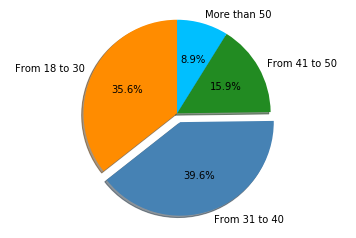

In [59]:
# count the number of trips for all age groups
From_18_to_30 = age.query('member_age_as_group == "From 18 to 30"')['bike_id'].count()
From_31_to_40 = age.query('member_age_as_group == "From 31 to 40"')['bike_id'].count()
From_41_to_50 = age.query('member_age_as_group == "From 41 to 50"')['bike_id'].count()
More_than_50 = age.query('member_age_as_group == "More than 50"')['bike_id'].count()

# calculate the proportion for all age groups
From_18_to_30_proportion = From_18_to_30 / age['bike_id'].count()
From_31_to_40_proportion = From_31_to_40 / age['bike_id'].count()
From_41_to_50_proportion = From_41_to_50 / age['bike_id'].count()
More_than_50_proportion = More_than_50 / age['bike_id'].count()


labels = ['From 18 to 30', 'From 31 to 40', 'From 41 to 50', 'More than 50']
sizes = [From_18_to_30_proportion, From_31_to_40_proportion, From_41_to_50_proportion, More_than_50_proportion]
colors = ['darkorange', 'steelblue' , 'forestgreen', 'deepskyblue']
explode = (0, 0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

From the figure above, we can see that 39.6% are in the age range of 31 to 40, this is the highest age group.

The least age group are people older than 50 with 8.9%.

<a id='recap'></a>
## Summary of Main Findings

-  Viva Calle SJ has the longest average duration for a starting station, and SF Test Station has the shortest average duration for a starting station.

- 16th St Depot by far has the longest average duration for an ending station, and MacArthur BART Station has the shortest average duration for a ending station.

- Females have an average age of 34.20, and males have an average age of 35.47.

- In the case of females, we have 629327 subscribers and 106363 customers ,and in the case of males, we have 2019034 subscribers and 232094 customers.

- In the case of females, we have 580956 non-subscribers to the bike share service and 56113 subscribers, and in the case of males, we have 1726650 non-subscribers to the bike share service and 176160 subscribers.

- Customers have an average age of 33.51, Subscribers have an average age of 35.38.

- Most trips are less than 5000 seconds (83 min), and the highest number of trips (peak) has a duration of 600 seconds. (10 min)

- The number of rides has increased. And it's increasing constantly.

- March and April have the highest number of trips (More than 350000). May, on the other hand, has the least number of trips (Less than 200000).

- Weekend days have the least number of trips (about 300000). Meanwhile, work days are so busy. All work has more than 500000 trips.

- 8 am and 5 pm have the highest number of trips. 3 and 4 am have the least number of trips.

- People form 31 to 40 used to be the one who are using gobike the most. However, after mid-2018, the number of younger people (from 18 to 30) have increased. Now they are the one who uses gobike the most.

- 39.6% are in the age range of 31 to 40, this is the highest age group, and the least age group are people older than 50 with 8.9%.